In [48]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
def parser(s):
    pattern = re.compile('Epoch (\d+) : loss (\d+\.\d+) ; validation-accuracy: (-?\d+\.\d+) ; validation-accurary-x (-?\d+\.\d+) ; insample-accuracy-x (-?\d+\.\d+)')
    mo = pattern.search(s)
    return mo
def read_log(tag):
# tag = 'baseline'
    filename = f'~/labshare/UKB/ptrs-tf/models/cnnPTRS/{tag}.log'
    logfile = f'temp.{tag}.log'
    !cat {filename} |grep Epoch > temp.{tag}.log
    out_dic = {
        'epoch': [],
        'loss': [],
        'valid_accuracy': [],
        'valid_accuracy_x': [],
        'insample_accuracy_x': []
    }
    epochs = []
    losses = []
    valid_acces = []
    valid_accu_xes = []
    insample_accu_xes = []
    with open(logfile, 'r') as f:
        for i in f:
            e = parser(i).groups()
            epoch, loss, valid_acc, valid_accu_x, insample_accu_x = [ float(h) for h in e ]
            out_dic['epoch'].append(epoch)
            out_dic['loss'].append(loss)
            out_dic['valid_accuracy'].append(valid_acc)
            out_dic['valid_accuracy_x'].append(valid_accu_x)
            out_dic['insample_accuracy_x'].append(insample_accu_x)
    return pd.DataFrame(out_dic)
            

In [72]:
# tag = 'baseline'
out = None
tags = ['baseline', 'cnn_ptrs_1', 'mlp_ptrs_1', 'cnn_ptrs_2', 'mlp_ptrs_2']
types = ['loss', 'valid_accuracy', 'valid_accuracy_x', 'insample_accuracy_x']
for tag in tags:
    tmp = read_log(tag)
    tmp['tag'] = tag
    if out is None:
        out = tmp
    else:
        out = pd.concat([out, tmp])
# out

,epoch,loss,valid_accuracy,valid_accuracy_x,insample_accuracy_x,tag
0,0.0,1.421901,-0.004575,0.001656,-0.002232,baseline
1,1.0,0.982808,0.141951,0.057297,0.066677,baseline
2,2.0,0.868535,0.225109,0.103236,0.123894,baseline
3,3.0,0.826762,0.270820,0.134827,0.163373,baseline
4,4.0,0.807959,0.296567,0.153896,0.187713,baseline
...,...,...,...,...,...,...
215,215.0,0.435341,0.195383,0.048449,0.152188,mlp_ptrs_2
216,216.0,0.434825,0.195176,0.048489,0.152659,mlp_ptrs_2
217,217.0,0.434125,0.195035,0.048572,0.152996,mlp_ptrs_2
218,218.0,0.433471,0.194950,0.048740,0.153411,mlp_ptrs_2


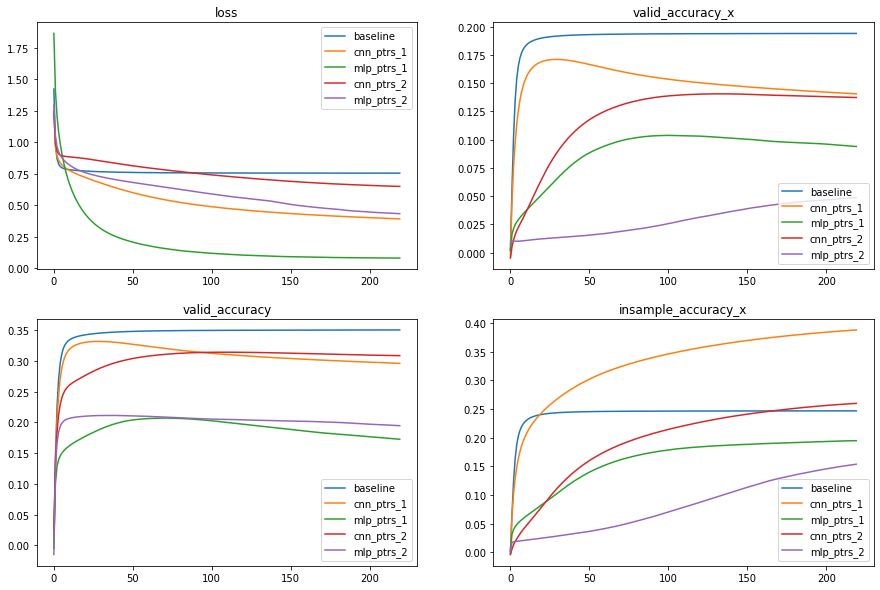

In [73]:
fig, aes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
for i in tags:
    tmp_ = out.loc[out['tag'] == i]
    for j in zip([0,0,1,1],[0,1,0,1]): 
        n = j[0] + j[1] * 2
        aes[j].plot(tmp_[['epoch']], tmp_[types[n]], label = i)
        aes[j].legend()
        aes[j].set_title(types[n])